This notebook demonstrates using Bayesian Optimization to tune the hyper-parameters (learning rate and the penalty term gamma) in xgboost. 

Acquisition function is defined as negative of expected improvement, or negative of the upper confidence bound. So the optimization schema will look for points that lead to large negative acquisition function values.

In [2]:
import numpy as np
import importlib
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost.sklearn import XGBClassifier

from bayesian_optimization import BayesianOptimization
from bo_plot_utils import plot_iteration

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
from plot_functions import adjustAxeProperties

In [3]:
X_train, y_train = make_classification(n_samples=10000,
                                       n_features=100,
                                       n_informative=55,
                                       n_redundant=5)

def sample_loss(params):
    learning_rate = 10 ** params[0]
    gamma = 10 ** params[1]
    return cross_val_score(XGBClassifier(n_estimators=200, learning_rate=learning_rate, gamma=gamma),
                           X=X_train, y=y_train, scoring='roc_auc', cv=3).mean()

bounds = np.array([[-6.0, 1.0], [-1.0, 3.0]])

learning_rate_values = np.linspace(bounds[0][0], bounds[0][1], 30)
gamma_values = np.linspace(bounds[1][0], bounds[1][1], 30)


In [4]:
bo = BayesianOptimization(sample_loss, bounds=bounds, policy='ucb')  # 'ei'
bo.fit(n_iter=15, n_pre_samples=3, random_search=10000)
X_history, y_history = bo.get_iteration_history()

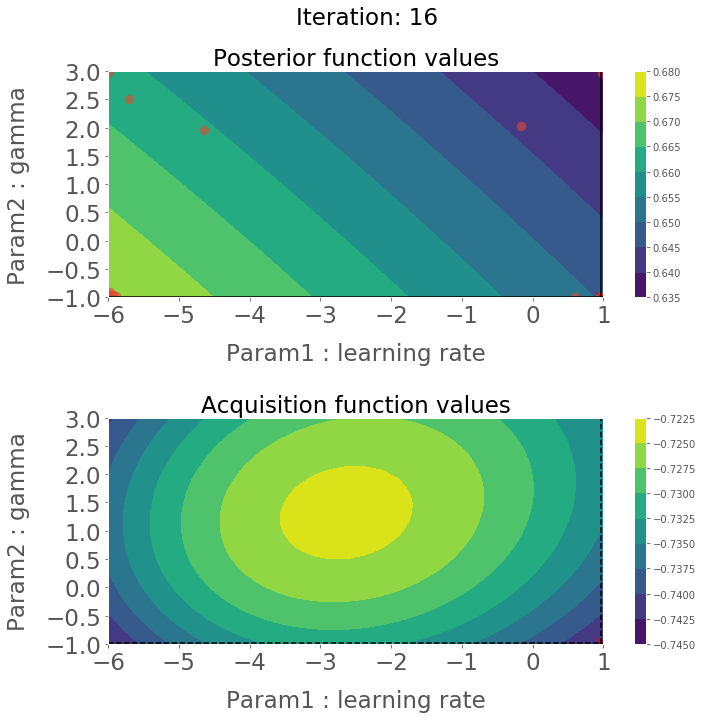

In [5]:
plot_iteration(bo, learning_rate_values, X_history, y_history, 3, gamma_values, 
               ': learning rate', ': gamma')

In [ ]:
# convert -delay 100 -loop 0 -dispose previous iteration_??.png bayesian_xgboost_params_tuning.gif

In [7]:
from IPython.display import HTML
HTML('<img src="bayesian_xgboost_params_tuning.gif">')